In [1]:
# Paramètre(s) du notebook

# VERBOSE=True
VERBOSE=True

OPTIONS=""
if not VERBOSE:
    OPTIONS="--quiet"

In [ ]:
!pip install geopandas $OPTIONS
!pip install plotly $OPTIONS
!pip install matplotlib

In [10]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd 
import plotly.express as px
from IPython.core.display import display, HTML

/tmp/ipykernel_278/1024625163.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [12]:
def asciiprint(variable,desc):
    print("-"*100)
    print(variable,":",desc)
    print("-"*100)

def showgraph(departements,df,dep_idf,df_idf,var,color,label):
    asciiprint(var,label)
    fig, ax = plt.subplots(figsize=(10,10))

    departements.plot(color='gray', ax=ax)
    df.plot(column=var, 
                        cmap=color, 
                        linewidth=0.5, 
                        edgecolor='black',
                        ax=ax, 
                        legend=True,
                        legend_kwds={'label': label, 'orientation': "horizontal"})
    ax.set_axis_off()
    
    fig, ax = plt.subplots(figsize=(10,10))

    dep_idf.plot(color='gray', ax=ax)
    df_idf.plot(column=var, 
                        cmap=color, 
                        linewidth=0.5, 
                        edgecolor='black',
                        ax=ax, 
                        legend=True,
                        legend_kwds={'label': label, 'orientation': "horizontal"})
    ax.set_axis_off()

In [7]:
## Chargement des données de localisation données socio-économiques précédemment téléchargées et netoyées

In [15]:
%store -r base_travail
base_travail.sample(10)

,tx_chom1524_T,pop_tot,DEP,REG,rev_median,tx_pauv,rat_interDec
codgeo,,,,,,,
60422,20.0,210.0,60,32,30060.0,NaN,NaN
68255,13.3,1428.0,68,44,25960.0,NaN,NaN
42197,40.4,1077.0,42,84,20560.0,NaN,NaN
35264,17.1,2079.0,35,53,23480.0,NaN,2.2
45063,33.3,951.0,45,24,20350.0,NaN,NaN
09164,42.9,516.0,9,76,20700.0,NaN,NaN
11177,NaN,32.0,11,76,NaN,NaN,NaN
24568,38.1,1070.0,24,75,18620.0,NaN,NaN
35108,10.0,1084.0,35,53,21800.0,NaN,NaN


In [24]:
url_com = 'https://www.data.gouv.fr/fr/datasets/r/61b8f19d-66ce-4ad3-a9c4-82502dc9d550'
communes = gpd.read_file(url_com)
communes.sample(10)

,insee,nom,wikipedia,surf_ha,geometry
13698,10263,Neuville-sur-Vanne,fr:Neuville-sur-Vanne,1720.0,"POLYGON ((3.74880 48.23890, 3.75172 48.24056, ..."
31021,60240,Fontaine-Bonneleau,fr:Fontaine-Bonneleau,1637.0,"POLYGON ((2.10504 49.67107, 2.10507 49.67111, ..."
20332,97615,Pamandzi,fr:Pamandzi,437.0,"MULTIPOLYGON (((45.27132 -12.79326, 45.27136 -..."
1897,43074,Cohade,fr:Cohade (Haute-Loire),1017.0,"POLYGON ((3.34813 45.35206, 3.34825 45.35204, ..."
34731,68297,Saint-Louis,fr:Saint-Louis (Haut-Rhin),1702.0,"POLYGON ((7.50878 47.63063, 7.51090 47.63092, ..."
9006,28055,Le Boullay-Thierry,fr:Le Boullay-Thierry,1299.0,"POLYGON ((1.40885 48.63837, 1.40893 48.63842, ..."
3234,76097,Biville-la-Rivière,fr:Biville-la-Rivière,221.0,"POLYGON ((0.90152 49.77322, 0.90169 49.77376, ..."
10764,82012,Les Barthes,fr:Les Barthes,820.0,"POLYGON ((1.14954 44.08837, 1.14956 44.08847, ..."
11808,90013,Bethonvilliers,fr:Bethonvilliers,193.0,"POLYGON ((6.95767 47.68905, 6.95874 47.68948, ..."
29748,38552,Villard-Saint-Christophe,fr:Villard-Saint-Christophe,1428.0,"POLYGON ((5.78617 44.97319, 5.78650 44.97381, ..."


In [41]:
communes = communes[["insee", "geometry"]]
communes.columns = ["CODGEO", "geometry"]
communes.sample(10)

KeyError: "['insee'] not in index"

In [ ]:
#Restriction au champ IDF pour une sous-carte
communes_idf = communes.loc[communes['CODGEO'].str.slice(0, 2).isin(['75','77','78','91','92','93','94','95'])]
if VERBOSE:
    display(communes_idf)
communes_idf.sort_values(by=['CODGEO'])

In [ ]:
communes.set_index('CODGEO')

In [59]:
base_travail.index.names = ['CODCOM']

if VERBOSE:
    display(base_travail.describe())
base_travail_pauvrete = base_travail['tx_pauv'].to_frame()
base_travail_rev_median = base_travail['rev_median'].to_frame()
base_travail_ratio_d1_d9 = base_travail['rat_interDec'].to_frame()
base_travail_tx_chom1524_T = base_travail['tx_chom1524_T'].to_frame()

,tx_chom1524_T,pop_tot,rev_median,tx_pauv,rat_interDec
count,33763.000000,34454.000000,31040.000000,4243.000000,5210.000000
mean,24.485866,1810.456231,22079.434601,13.242988,2.923301
std,16.589090,7979.691763,3021.043399,6.240702,0.556145
min,0.000000,1.000000,11730.000000,5.000000,2.000000
25%,14.600000,204.000000,20180.000000,9.000000,2.600000
50%,23.400000,469.000000,21620.000000,12.000000,2.800000
75%,33.300000,1179.000000,23460.000000,17.000000,3.100000
max,100.000000,498596.000000,51720.000000,46.000000,9.400000


In [60]:
base_travail_pauvrete.sample(10)
base_travail_rev_median.sample(10)
base_travail_ratio_d1_d9.sample(10)
base_travail_tx_chom1524_T.sample(10)

,tx_chom1524_T
CODCOM,
90052,24.8
02653,31.2
28121,20.0
33269,66.7
35302,20.6
71237,33.3
45293,30.4
21053,25.0
02747,20.0


In [27]:
base_travail_pauvrete.index.names = ['CODGEO']
base_travail_pauvrete.sample(10)

,tx_pauv
CODGEO,
86151,NaN
77307,8.0
42333,NaN
60194,NaN
59506,NaN
41151,15.0
65082,NaN
65355,NaN
38254,NaN


In [29]:
base_travail_rev_median.index.names = ['CODGEO']
base_travail_rev_median.sample(10)

,rev_median
CODGEO,
40316,20860.0
48107,23700.0
76737,22610.0
26102,22760.0
61137,19690.0
67283,22060.0
62046,19400.0
25184,20510.0
07187,17890.0


In [42]:
base_travail_ratio_d1_d9.index.names = ['CODGEO']
base_travail_ratio_d1_d9.sample(10)

,rat_interDec
CODGEO,
49368,NaN
11300,NaN
14063,NaN
80499,NaN
82172,NaN
31090,NaN
31019,NaN
45158,NaN
71417,NaN


In [61]:
base_travail_tx_chom1524_T.index.names = ['CODGEO']
base_travail_tx_chom1524_T.sample(10)

,tx_chom1524_T
CODGEO,
38336,15.2
51125,25.0
32040,60.0
67088,0.0
19145,8.8
62494,33.3
10278,14.3
09152,NaN
19047,50.0


In [34]:
communes['dep'] = communes['CODGEO'].str[:2]
communes['dep'] = communes['dep'].replace({'2A': 20})
communes['dep'] = communes['dep'].replace({'2B': 20})
communes['dep']  = pd.to_numeric(communes['dep'])
communes = communes.loc[communes["dep"] <=95]
communes.sort_values(by=['CODGEO'])

,CODGEO,geometry,dep
8838,01001,"POLYGON ((4.90298 46.15828, 4.90299 46.15835, ...",1
27214,01002,"POLYGON ((5.40408 46.00793, 5.40434 46.00813, ...",1
27245,01004,"POLYGON ((5.32722 45.95685, 5.32740 45.95680, ...",1
12654,01005,"POLYGON ((4.87552 45.98726, 4.87564 45.98729, ...",1
27222,01006,"POLYGON ((5.57068 45.75369, 5.57255 45.75382, ...",1
...,...,...,...
3114,95676,"POLYGON ((1.70345 49.07909, 1.70371 49.07954, ...",95
23544,95678,"POLYGON ((2.20277 49.06492, 2.20311 49.06497, ...",95
22761,95680,"POLYGON ((2.37885 49.00688, 2.37892 49.00727, ...",95
22765,95682,"POLYGON ((2.36722 49.06828, 2.37024 49.07275, ...",95


In [35]:
carto_pauvrete=communes.merge(base_travail_pauvrete, how='left', on='CODGEO')
carto_pauvrete.sort_values(by=['CODGEO'])

,CODGEO,geometry,dep,tx_pauv
8830,01001,"POLYGON ((4.90298 46.15828, 4.90299 46.15835, ...",1,NaN
27174,01002,"POLYGON ((5.40408 46.00793, 5.40434 46.00813, ...",1,NaN
27205,01004,"POLYGON ((5.32722 45.95685, 5.32740 45.95680, ...",1,18.0
12636,01005,"POLYGON ((4.87552 45.98726, 4.87564 45.98729, ...",1,NaN
27182,01006,"POLYGON ((5.57068 45.75369, 5.57255 45.75382, ...",1,NaN
...,...,...,...,...
3106,95676,"POLYGON ((1.70345 49.07909, 1.70371 49.07954, ...",95,NaN
23509,95678,"POLYGON ((2.20277 49.06492, 2.20311 49.06497, ...",95,NaN
22726,95680,"POLYGON ((2.37885 49.00688, 2.37892 49.00727, ...",95,35.0
22730,95682,"POLYGON ((2.36722 49.06828, 2.37024 49.07275, ...",95,NaN


In [36]:
carto_pauvrete['dep'] = carto_pauvrete['CODGEO'].str[:2]
carto_pauvrete['dep'] = carto_pauvrete['dep'].replace({'2A': 20})
carto_pauvrete['dep'] = carto_pauvrete['dep'].replace({'2B': 20})
carto_pauvrete['dep']  = pd.to_numeric(carto_pauvrete['dep'])
carto_pauvrete = carto_pauvrete.loc[carto_pauvrete["dep"] <=95]
carto_pauvrete.sort_values(by=['CODGEO'])

,CODGEO,geometry,dep,tx_pauv
8830,01001,"POLYGON ((4.90298 46.15828, 4.90299 46.15835, ...",1,NaN
27174,01002,"POLYGON ((5.40408 46.00793, 5.40434 46.00813, ...",1,NaN
27205,01004,"POLYGON ((5.32722 45.95685, 5.32740 45.95680, ...",1,18.0
12636,01005,"POLYGON ((4.87552 45.98726, 4.87564 45.98729, ...",1,NaN
27182,01006,"POLYGON ((5.57068 45.75369, 5.57255 45.75382, ...",1,NaN
...,...,...,...,...
3106,95676,"POLYGON ((1.70345 49.07909, 1.70371 49.07954, ...",95,NaN
23509,95678,"POLYGON ((2.20277 49.06492, 2.20311 49.06497, ...",95,NaN
22726,95680,"POLYGON ((2.37885 49.00688, 2.37892 49.00727, ...",95,35.0
22730,95682,"POLYGON ((2.36722 49.06828, 2.37024 49.07275, ...",95,NaN


In [39]:
#Restriction au champ IDF pour une sous-carte

carto_pauvrete_idf = carto_pauvrete.loc[carto_pauvrete['CODGEO'].str.slice(0, 2).isin(['75','77','78','91','92','93','94','95'])]

----------------------------------------------------------------------------------------------------
tx_pauv : Taux de pauvreté monétaire (au seuil de 60% du niveau de vie médian)
----------------------------------------------------------------------------------------------------


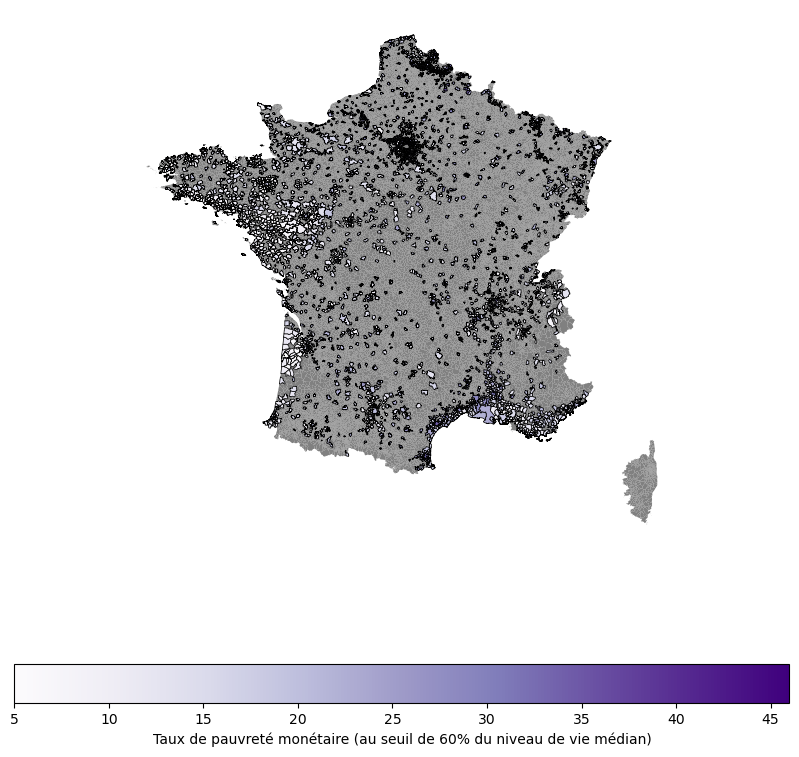

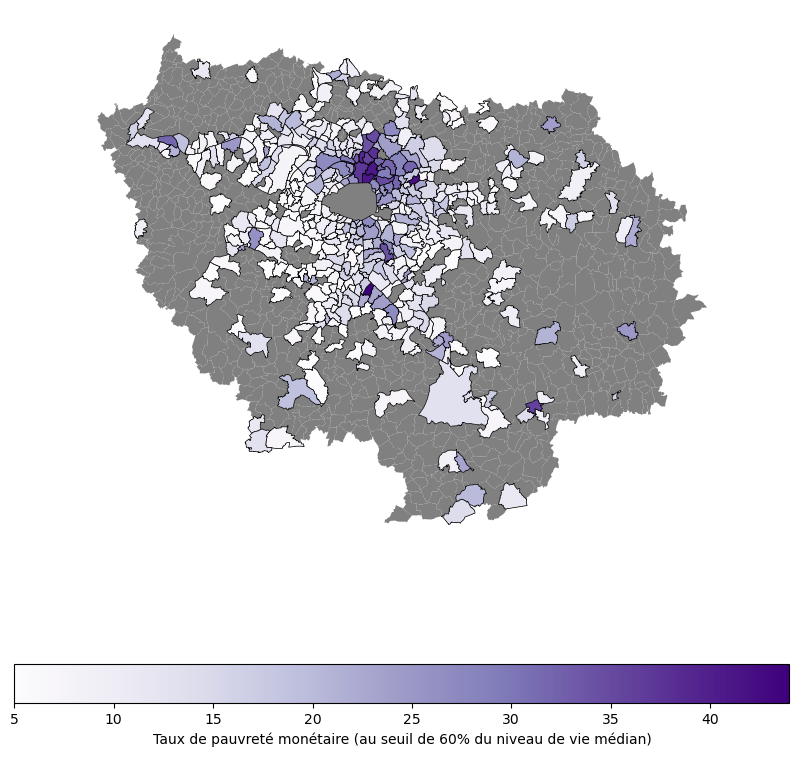

In [40]:
showgraph(communes,carto_pauvrete,communes_idf,carto_pauvrete_idf,'tx_pauv','Purples','Taux de pauvreté monétaire (au seuil de 60% du niveau de vie médian)')


In [44]:
carto_ratio_d1_d9=communes.merge(base_travail_ratio_d1_d9, how='left', on='CODGEO')
carto_ratio_d1_d9.sort_values(by=['CODGEO'])

,CODGEO,geometry,dep,rat_interDec
8830,01001,"POLYGON ((4.90298 46.15828, 4.90299 46.15835, ...",1,NaN
27174,01002,"POLYGON ((5.40408 46.00793, 5.40434 46.00813, ...",1,NaN
27205,01004,"POLYGON ((5.32722 45.95685, 5.32740 45.95680, ...",1,3.2
12636,01005,"POLYGON ((4.87552 45.98726, 4.87564 45.98729, ...",1,NaN
27182,01006,"POLYGON ((5.57068 45.75369, 5.57255 45.75382, ...",1,NaN
...,...,...,...,...
3106,95676,"POLYGON ((1.70345 49.07909, 1.70371 49.07954, ...",95,NaN
23509,95678,"POLYGON ((2.20277 49.06492, 2.20311 49.06497, ...",95,NaN
22726,95680,"POLYGON ((2.37885 49.00688, 2.37892 49.00727, ...",95,3.1
22730,95682,"POLYGON ((2.36722 49.06828, 2.37024 49.07275, ...",95,NaN


In [45]:
carto_ratio_d1_d9['dep'] = carto_ratio_d1_d9['CODGEO'].str[:2]
carto_ratio_d1_d9['dep'] = carto_ratio_d1_d9['dep'].replace({'2A': 20})
carto_ratio_d1_d9['dep'] = carto_ratio_d1_d9['dep'].replace({'2B': 20})
carto_ratio_d1_d9['dep']  = pd.to_numeric(carto_ratio_d1_d9['dep'])
carto_ratio_d1_d9 = carto_ratio_d1_d9.loc[carto_ratio_d1_d9["dep"] <=95]
carto_ratio_d1_d9.sort_values(by=['CODGEO'])

,CODGEO,geometry,dep,rat_interDec
8830,01001,"POLYGON ((4.90298 46.15828, 4.90299 46.15835, ...",1,NaN
27174,01002,"POLYGON ((5.40408 46.00793, 5.40434 46.00813, ...",1,NaN
27205,01004,"POLYGON ((5.32722 45.95685, 5.32740 45.95680, ...",1,3.2
12636,01005,"POLYGON ((4.87552 45.98726, 4.87564 45.98729, ...",1,NaN
27182,01006,"POLYGON ((5.57068 45.75369, 5.57255 45.75382, ...",1,NaN
...,...,...,...,...
3106,95676,"POLYGON ((1.70345 49.07909, 1.70371 49.07954, ...",95,NaN
23509,95678,"POLYGON ((2.20277 49.06492, 2.20311 49.06497, ...",95,NaN
22726,95680,"POLYGON ((2.37885 49.00688, 2.37892 49.00727, ...",95,3.1
22730,95682,"POLYGON ((2.36722 49.06828, 2.37024 49.07275, ...",95,NaN


In [46]:
#Restriction au champ IDF pour une sous-carte

carto_ratio_d1_d9_idf = carto_ratio_d1_d9.loc[carto_ratio_d1_d9['CODGEO'].str.slice(0, 2).isin(['75','77','78','91','92','93','94','95'])]

----------------------------------------------------------------------------------------------------
rat_interDec : Test
----------------------------------------------------------------------------------------------------


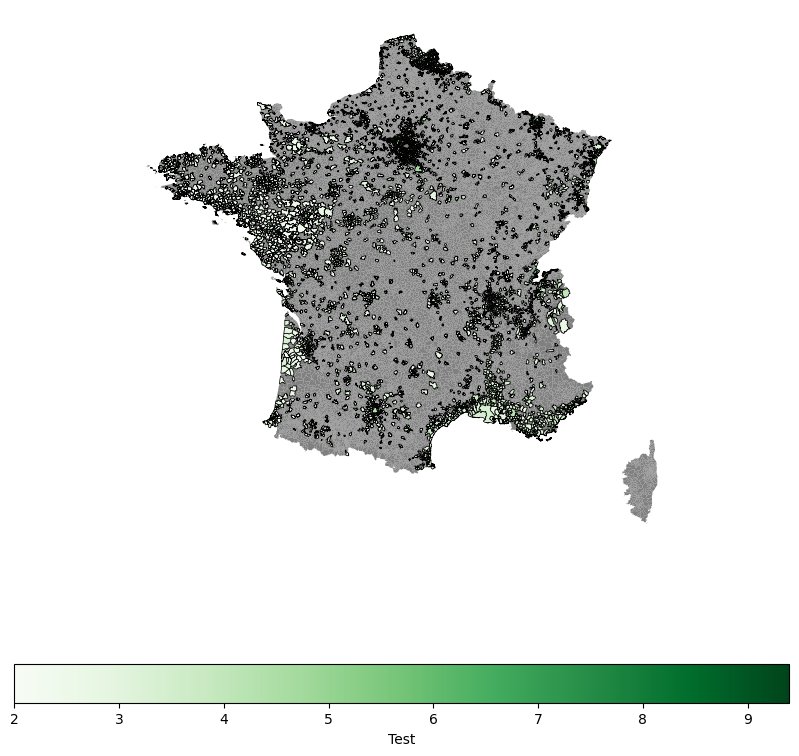

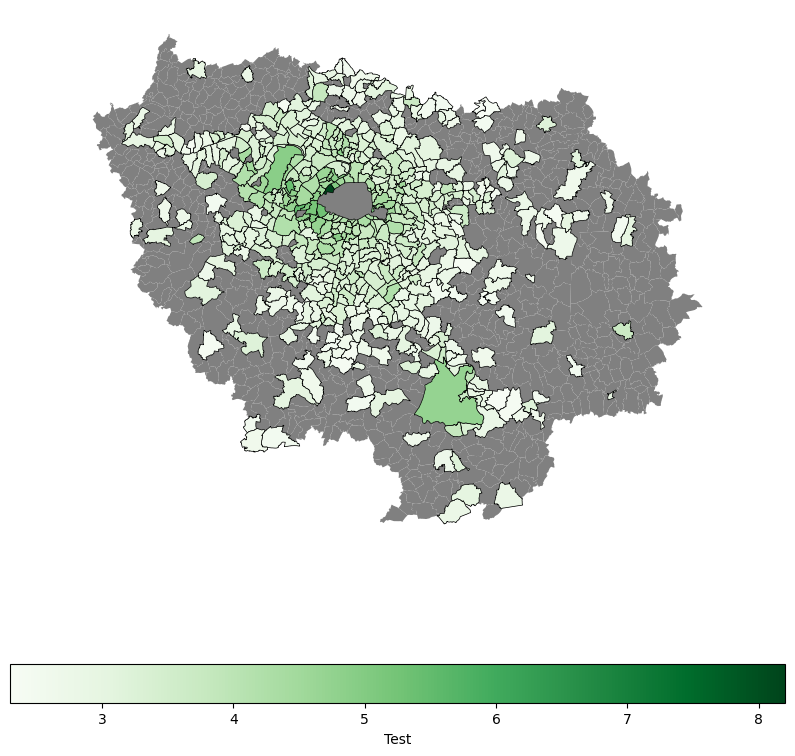

In [52]:
showgraph(communes,carto_ratio_d1_d9,communes_idf,carto_ratio_d1_d9_idf,'rat_interDec','Greens','Ratio interdecile')

In [53]:
carto_rev_median=communes.merge(base_travail_rev_median, how='left', on='CODGEO')
carto_rev_median.sort_values(by=['CODGEO'])


,CODGEO,geometry,dep,rev_median
8830,01001,"POLYGON ((4.90298 46.15828, 4.90299 46.15835, ...",1,23970.0
27174,01002,"POLYGON ((5.40408 46.00793, 5.40434 46.00813, ...",1,23640.0
27205,01004,"POLYGON ((5.32722 45.95685, 5.32740 45.95680, ...",1,20510.0
12636,01005,"POLYGON ((4.87552 45.98726, 4.87564 45.98729, ...",1,24050.0
27182,01006,"POLYGON ((5.57068 45.75369, 5.57255 45.75382, ...",1,NaN
...,...,...,...,...
3106,95676,"POLYGON ((1.70345 49.07909, 1.70371 49.07954, ...",95,26250.0
23509,95678,"POLYGON ((2.20277 49.06492, 2.20311 49.06497, ...",95,30410.0
22726,95680,"POLYGON ((2.37885 49.00688, 2.37892 49.00727, ...",95,15560.0
22730,95682,"POLYGON ((2.36722 49.06828, 2.37024 49.07275, ...",95,25570.0


In [54]:
carto_rev_median['dep'] = carto_rev_median['CODGEO'].str[:2]
carto_rev_median['dep'] = carto_rev_median['dep'].replace({'2A': 20})
carto_rev_median['dep'] = carto_rev_median['dep'].replace({'2B': 20})
carto_rev_median['dep']  = pd.to_numeric(carto_rev_median['dep'])
carto_rev_median = carto_rev_median.loc[carto_rev_median["dep"] <=95]
carto_rev_median.sort_values(by=['CODGEO'])

,CODGEO,geometry,dep,rev_median
8830,01001,"POLYGON ((4.90298 46.15828, 4.90299 46.15835, ...",1,23970.0
27174,01002,"POLYGON ((5.40408 46.00793, 5.40434 46.00813, ...",1,23640.0
27205,01004,"POLYGON ((5.32722 45.95685, 5.32740 45.95680, ...",1,20510.0
12636,01005,"POLYGON ((4.87552 45.98726, 4.87564 45.98729, ...",1,24050.0
27182,01006,"POLYGON ((5.57068 45.75369, 5.57255 45.75382, ...",1,NaN
...,...,...,...,...
3106,95676,"POLYGON ((1.70345 49.07909, 1.70371 49.07954, ...",95,26250.0
23509,95678,"POLYGON ((2.20277 49.06492, 2.20311 49.06497, ...",95,30410.0
22726,95680,"POLYGON ((2.37885 49.00688, 2.37892 49.00727, ...",95,15560.0
22730,95682,"POLYGON ((2.36722 49.06828, 2.37024 49.07275, ...",95,25570.0


In [57]:
#Restriction au champ IDF pour une sous-carte

carto_rev_median_idf = carto_rev_median.loc[carto_ratio_d1_d9['CODGEO'].str.slice(0, 2).isin(['75','77','78','91','92','93','94','95'])]

----------------------------------------------------------------------------------------------------
rev_median : Revenu median
----------------------------------------------------------------------------------------------------


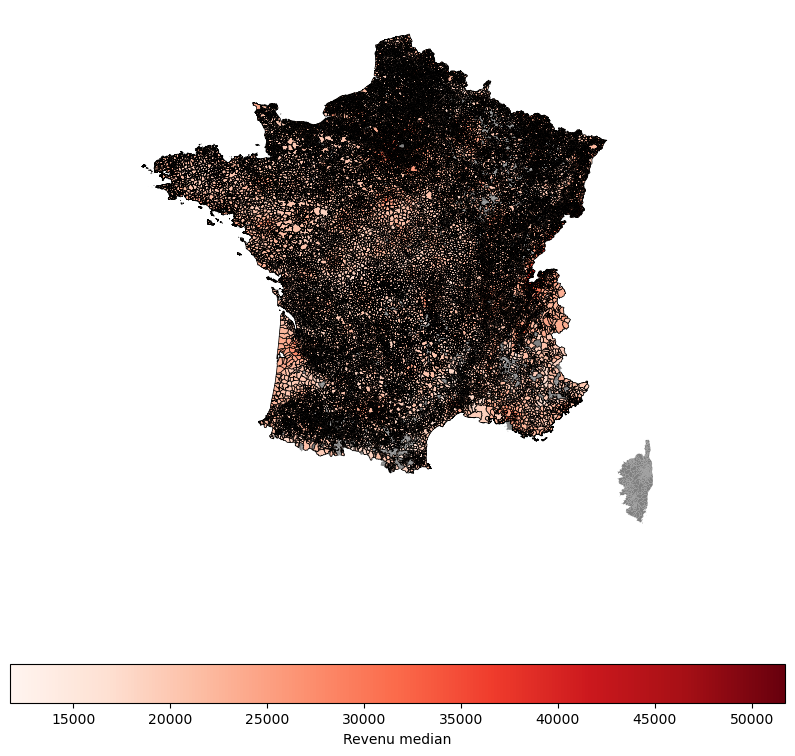

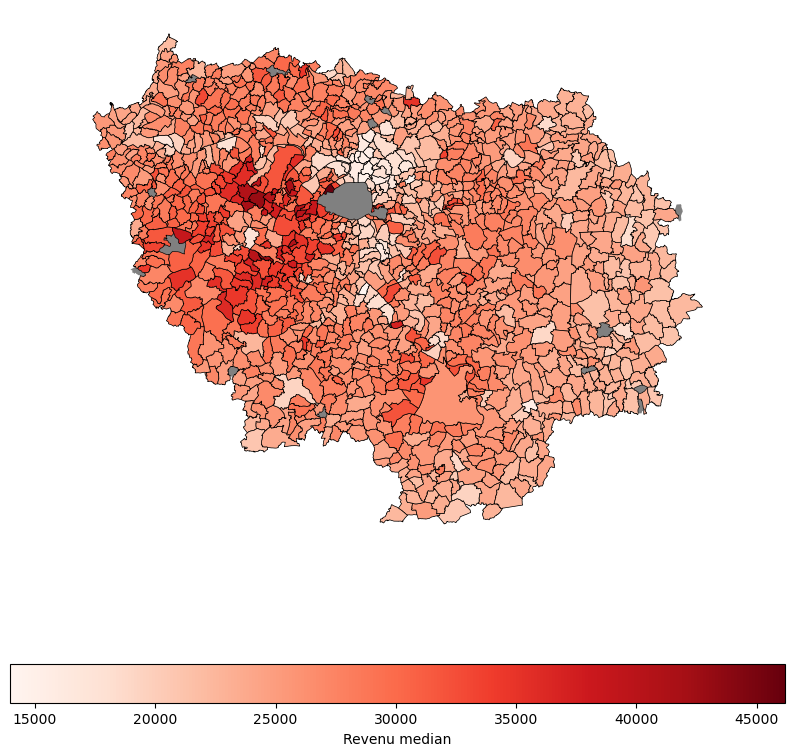

In [58]:
showgraph(communes,carto_rev_median,communes_idf,carto_rev_median_idf,'rev_median','Reds','Revenu median')

In [68]:
carto_tx_chom1524_T=communes.merge(base_travail_tx_chom1524_T, how='left', on='CODGEO')
carto_tx_chom1524_T.sort_values(by=['CODGEO'])

,CODGEO,geometry,dep,tx_chom1524_T
8830,01001,"POLYGON ((4.90298 46.15828, 4.90299 46.15835, ...",1,30.8
27174,01002,"POLYGON ((5.40408 46.00793, 5.40434 46.00813, ...",1,66.7
27205,01004,"POLYGON ((5.32722 45.95685, 5.32740 45.95680, ...",1,25.9
12636,01005,"POLYGON ((4.87552 45.98726, 4.87564 45.98729, ...",1,9.2
27182,01006,"POLYGON ((5.57068 45.75369, 5.57255 45.75382, ...",1,42.9
...,...,...,...,...
3106,95676,"POLYGON ((1.70345 49.07909, 1.70371 49.07954, ...",95,14.3
23509,95678,"POLYGON ((2.20277 49.06492, 2.20311 49.06497, ...",95,26.5
22726,95680,"POLYGON ((2.37885 49.00688, 2.37892 49.00727, ...",95,32.4
22730,95682,"POLYGON ((2.36722 49.06828, 2.37024 49.07275, ...",95,30.0


In [69]:
carto_tx_chom1524_T['dep'] = carto_tx_chom1524_T['CODGEO'].str[:2]
carto_tx_chom1524_T['dep'] = carto_tx_chom1524_T['dep'].replace({'2A': 20})
carto_tx_chom1524_T['dep'] = carto_tx_chom1524_T['dep'].replace({'2B': 20})
carto_tx_chom1524_T['dep']  = pd.to_numeric(carto_tx_chom1524_T['dep'])
ccarto_tx_chom1524_T = carto_tx_chom1524_T.loc[carto_tx_chom1524_T["dep"] <=95]
carto_tx_chom1524_T.sort_values(by=['CODGEO'])

,CODGEO,geometry,dep,tx_chom1524_T
8830,01001,"POLYGON ((4.90298 46.15828, 4.90299 46.15835, ...",1,30.8
27174,01002,"POLYGON ((5.40408 46.00793, 5.40434 46.00813, ...",1,66.7
27205,01004,"POLYGON ((5.32722 45.95685, 5.32740 45.95680, ...",1,25.9
12636,01005,"POLYGON ((4.87552 45.98726, 4.87564 45.98729, ...",1,9.2
27182,01006,"POLYGON ((5.57068 45.75369, 5.57255 45.75382, ...",1,42.9
...,...,...,...,...
3106,95676,"POLYGON ((1.70345 49.07909, 1.70371 49.07954, ...",95,14.3
23509,95678,"POLYGON ((2.20277 49.06492, 2.20311 49.06497, ...",95,26.5
22726,95680,"POLYGON ((2.37885 49.00688, 2.37892 49.00727, ...",95,32.4
22730,95682,"POLYGON ((2.36722 49.06828, 2.37024 49.07275, ...",95,30.0


In [73]:
#Restriction au champ IDF pour une sous-carte

carto_tx_chom1524_T_idf = carto_tx_chom1524_T.loc[carto_tx_chom1524_T['CODGEO'].str.slice(0, 2).isin(['75','77','78','91','92','93','94','95'])]

----------------------------------------------------------------------------------------------------
tx_chom1524_T : Taux de chomage des jeunes de 15-24 ans
----------------------------------------------------------------------------------------------------


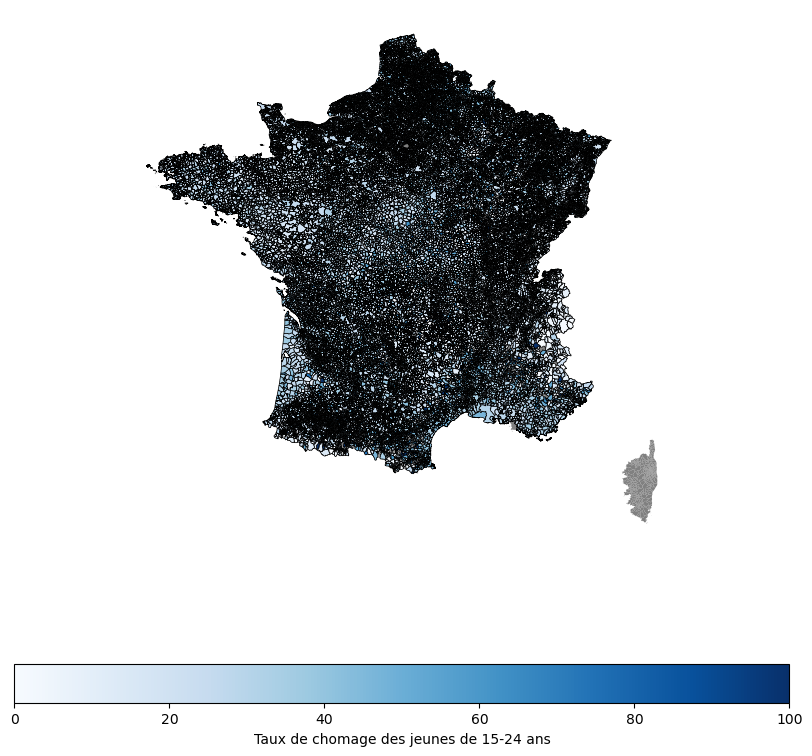

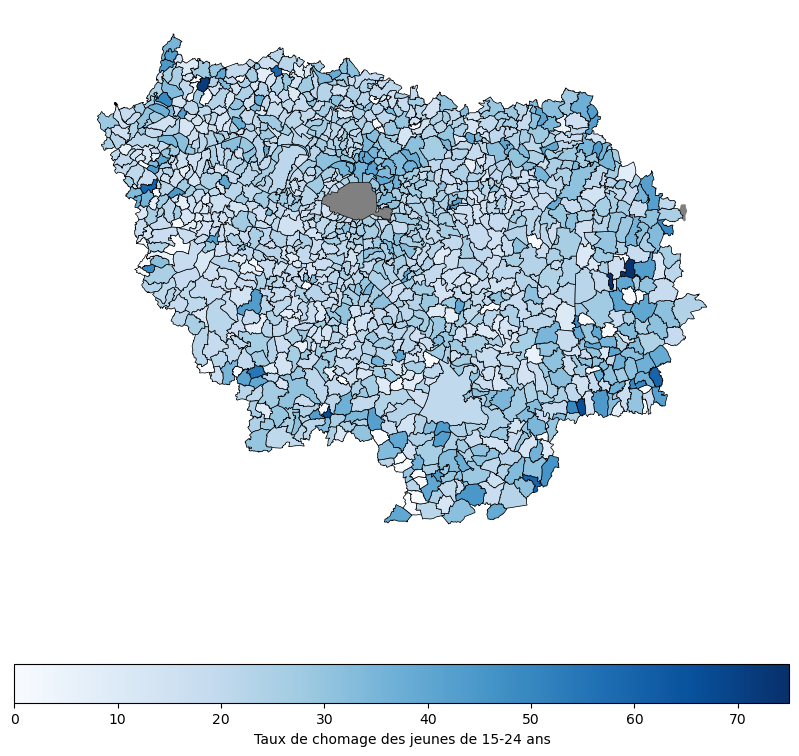

In [74]:
showgraph(communes,carto_tx_chom1524_T,communes_idf,carto_tx_chom1524_T_idf,'tx_chom1524_T','Blues','Taux de chomage des jeunes de 15-24 ans')